In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc('font', family='Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)

import scipy

from scipy import stats
from statsmodels.formula.api import ols

from statsmodels.stats.anova import anova_lm
from statsmodels.stats.proportion import proportions_ztest

from scipy.stats import chi2_contingency

#scale변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
# 로지스틱 회귀
from statsmodels.api import Logit


# 불량여부를 목표변수로 설정

## 데이터 불러오기

In [ ]:
df = pd.read_csv("C:/Users/jee99/Desktop/포스코 교육/빅데이터 프로젝트/A3_간편식_원본데이터/cookingdata_version5.csv", encoding = 'euc-kr')
df['불량여부'] = np.where(df['불량여부']=='불량',1 ,0)

## 카이제곱 검정

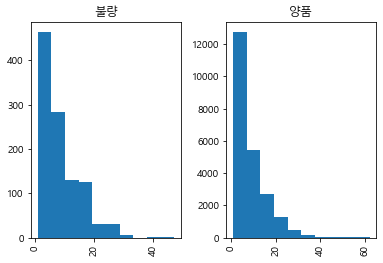

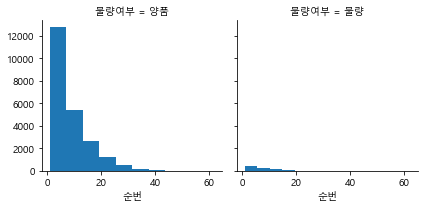

In [ ]:
# histogram 그래프 분석
df.hist(column = '순번',by = '불량여부')
grid = sns.FacetGrid(df, col = "불량여부")
grid.map(plt.hist, "순번")

In [ ]:
df2= df.pivot_table(index='불량여부', columns='순번', fill_value=0, aggfunc='size')
df2.head()

순번,1,2,3,4,5,6,7,8,9,10,...,53,54,55,56,57,58,59,60,61,62
불량여부,,,,,,,,,,,,,,,,,,,,,
0,2479,2201,2008,1780,1574,1421,1291,1163,1065,943,...,3,2,3,2,2,2,2,1,1,1
1,117,103,84,72,88,69,61,61,43,49,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
## 카이제곱 검정 실시
chi, pval, dof, expected = stats.chi2_contingency(df2)

print("chi-square test")
print("chisq : %.3f"%chi)
print("p : %f"%pval)
print("dgree of freedom : %.3f"%dof)
# print("expected value : \n{}".format(expected.round(3)))

chi-square test
chisq : 49.440
p : 0.855356
dgree of freedom : 61.000


##### *****p값이 0.05보다 큼으로 귀무가설을 채택하여 순번 에 대한 불량여부의 차이는 있다고 볼수 없음

In [ ]:
df2= df.pivot_table(index='불량여부', columns='생산라인코드', fill_value=0, aggfunc='size')
df2.head()

생산라인코드,C001,C002,C003,C004,C005,C006,C007,C008,C010,C045,...,P005,P006,P007,P008,P009,P010,P011,P021,P022,P0F0
불량여부,,,,,,,,,,,,,,,,,,,,,
0,839,1162,591,229,194,231,781,373,774,204,...,305,512,25,11,1,1,7,162,40,401
1,48,55,24,7,9,11,35,20,29,8,...,15,20,0,0,0,0,0,4,1,15


In [ ]:
## 카이제곱 검정 실시
chi, pval, dof, expected = stats.chi2_contingency(df2)

print("chi-square test")
print("chisq : %.3f"%chi)
print("p : %f"%pval)
print("dgree of freedom : %.3f"%dof)
# print("expected value : \n{}".format(expected.round(3)))

chi-square test
chisq : 53.566
p : 0.567535
dgree of freedom : 56.000


##### *****p값이 0.05보다 큼으로 귀무가설을 채택하여 생산라인코드에 대한 불량여부의 차이는 있다고 볼수 없음

In [ ]:
df3= df.pivot_table(index='불량여부', columns='품목명', fill_value=0, aggfunc='size')
df3.head()

품목명,(1)Homeplus signature 날치알이톡톡터지는날치알밥(알밥),(1)Homeplus signature날치알이톡톡터지는날치알밥(밥+후리가,(1)NEW새우볶음밥300g(칼로스쌀),(1)NEW햄야채볶음밥300g(칼로스쌀),(1)강원나물밥200g(알밥),(1)게살볶음밥E,(1)김치볶음밥S 3kg,(1)샘표갈비양념300g_RRP(핀란드)(재),(1)애슐리갈릭스테이크볶음밥,(1)애슐리깍두기치즈볶음밥,...,흑미밥-SH,흑미밥-쿡,흑설탕소스(3kg)(재),흑임자드레싱2kg(재),흑임자소스(재),흑참깨드레싱E,흑참깨드레싱E(재),흑초차베이스,흑초차베이스(재),흰쌀베이스밥
불량여부,,,,,,,,,,,,,,,,,,,,,
0,1,1,5,1,6,10,10,1,5,2,...,1,5,1,1,1,2,1,4,9,4
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
## 카이제곱 검정 실시
chi, pval, dof, expected = stats.chi2_contingency(df3)

print("chi-square test")
print("chisq : %.3f"%chi)
print("p : %f"%pval)
print("dgree of freedom : %.3f"%dof)
# print("expected value : \n{}".format(expected.round(3)))

chi-square test
chisq : 2969.433
p : 0.048328
dgree of freedom : 2843.000


##### *****p값이 0.05보다 작음으로 대립가설을 채택하여 품목명(=품목코드)에 따른 불량율에 차이가 있다.

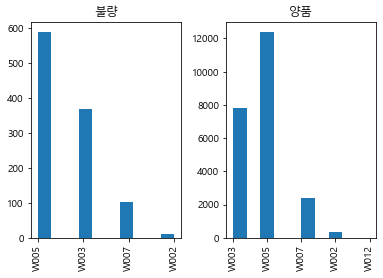

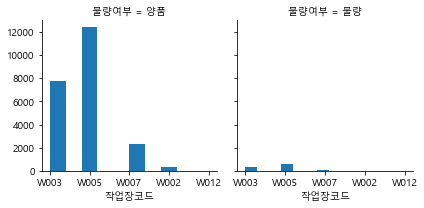

In [ ]:
# histogram 그래프 분석
df.hist(column = '작업장코드',by = '불량여부')
grid = sns.FacetGrid(df, col = "불량여부")
grid.map(plt.hist, "작업장코드")

In [ ]:
df4= df.pivot_table(index='불량여부', columns='작업장코드', fill_value=0, aggfunc='size')
df4.head()

작업장코드,W002,W003,W005,W007,W012
불량여부,,,,,
0,345,7784,12384,2372,15
1,12,368,589,103,0


In [ ]:
## 카이제곱 검정 실시
chi, pval, dof, expected = stats.chi2_contingency(df4)

print("chi-square test")
print("chisq : %.3f"%chi)
print("p : %f"%pval)
print("dgree of freedom : %.3f"%dof)
# print("expected value : \n{}".format(expected.round(3)))

chi-square test
chisq : 2.467
p : 0.650641
dgree of freedom : 4.000


##### *****p값이 0.05보다 큼으로 귀무가설을 채택하여 작업장코드에 대한 불량여부의 차이는 있다고 볼수 없음

## 로지스틱회귀분석

In [ ]:
log_model = Logit.from_formula("""불량여부~ 충전실온도+실링온도+쿠킹온도+쿠킹스팀압력+실링압력""", df)
log_result = log_model.fit()
print(log_result.summary())

         Current function value: 0.033652
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   불량여부   No. Observations:                23972
Model:                          Logit   Df Residuals:                    23966
Method:                           MLE   Df Model:                            5
Date:                Mon, 22 Aug 2022   Pseudo R-squ.:                  0.8158
Time:                        20:23:33   Log-Likelihood:                -806.71
converged:                      False   LL-Null:                       -4378.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.276e+04   4160.675      5.470      0.000    1.46e+04    3.09e+04
충전실온도         -4.0550      0.808     -5.017      0.000      -5.63

c:\Python39\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python39\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


##### *****충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력 모두 변수로서 유의함

# 생산시간을 목표변수로!!!!!

In [ ]:
df = pd.read_csv("C:/Users/jee99/Desktop/포스코 교육/빅데이터 프로젝트/A3_간편식_원본데이터/cookingdata_version6.csv", encoding = 'euc-kr')

In [ ]:
## 양품데이터만 가져오기
df1 = df['불량여부'] == '양품'
df2 = df[df1]

In [ ]:
from scipy.stats import shapiro

statistic,p = stats.shapiro(df2['생산시간'])
print("Shapiro-Wilk Test : statistics=%.3f,p-value=%.3f"%(statistic,p))

Shapiro-Wilk Test : statistics=0.973,p-value=0.000


##### *****정규성 만족x

## 생산시간기준 상관관계분석

In [ ]:
# 경고 메세지
import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
## 불량데이터만 가져오기
df1 = df['불량여부'] == '양품'
df2 = df[df1]

In [ ]:
df_cor = df2[['생산시간','충전실온도','실링온도','쿠킹온도','쿠킹스팀압력','실링압력','오류조치시간']]

In [ ]:
# 상관계수
df_cor.corr().round(3)

,생산시간,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,오류조치시간
생산시간,1.000,0.085,-0.001,0.007,0.256,0.147,NaN
충전실온도,0.085,1.000,-0.001,0.008,0.336,0.186,NaN
실링온도,-0.001,-0.001,1.000,1.000,-0.031,-0.017,NaN
쿠킹온도,0.007,0.008,1.000,1.000,-0.003,-0.002,NaN
쿠킹스팀압력,0.256,0.336,-0.031,-0.003,1.000,0.554,NaN
실링압력,0.147,0.186,-0.017,-0.002,0.554,1.000,NaN
오류조치시간,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 상관계수를 파악하기 전 산점도를 그려 두 변수 간에 관련성을 시각적으로 파악
y = df_cor['생산시간'].values
x1 = df_cor['충전실온도']
x2 = df_cor['실링온도']
x3 = df_cor['쿠킹온도']
x4 = df_cor['쿠킹스팀압력']
x5 = df_cor['실링압력']

오류조치시간, 충전실온도 상관분석


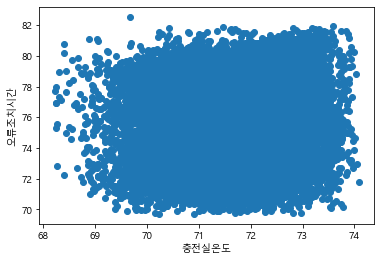

오류조치시간 / 충전실온도 corr :  0.0851749021050446
오류조치시간 / 충전실온도 p-value :  3.8483376113577623e-38
오류조치시간, 실링온도 상관분석


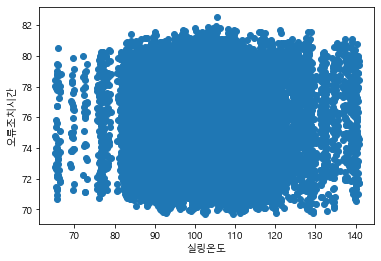

오류조치시간 / 실링온도 corr :  -0.0006205085871831485
오류조치시간 / 실링온도 p-value :  0.925192667806233
오류조치시간, 쿠킹온도 상관분석


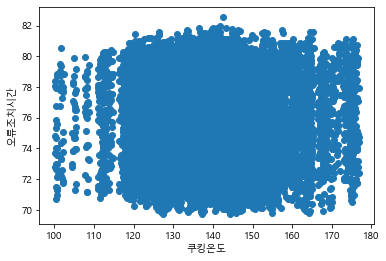

오류조치시간 / 쿠킹온도 corr :  0.006522076186600513
오류조치시간 / 쿠킹온도 p-value :  0.3236789954089641
오류조치시간, 쿠킹스팀압력 상관분석


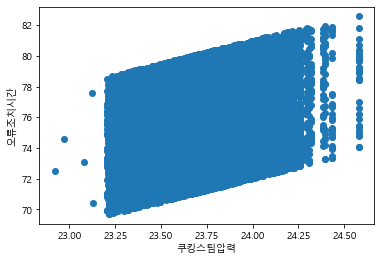

오류조치시간 / 쿠킹스팀압력 corr :  0.2561315316
오류조치시간 / 쿠킹스팀압력 p-value :  0.0
오류조치시간, 실링압력 상관분석


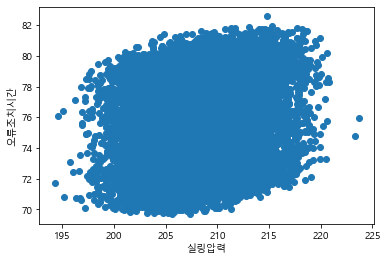

오류조치시간 / 실링압력 corr :  0.146576219237501
오류조치시간 / 실링압력 p-value :  3.667509074157969e-110
오류조치시간, 생산시간 상관분석


In [ ]:
print('생산시간, 충전실온도 상관분석')
# 충전실온도 산점도
plt.scatter(x1,y,alpha = 1)
plt.xlabel('충전실온도')
plt.ylabel('생산시간')
plt.show()
# 상관분석
corr1, pval1 = stats.pearsonr(y,x1)
print('생산시간 / 충전실온도 corr : ', corr1)
print('생산시간 / 충전실온도 p-value : ', pval1)

print('생산시간, 실링온도 상관분석')
# 실링온도 산점도
plt.scatter(x2,y,alpha = 1)
plt.xlabel('실링온도')
plt.ylabel('생산시간')
plt.show()
# 상관분석
corr2, pval2 = stats.pearsonr(y,x2)
print('생산시간 / 실링온도 corr : ', corr2)
print('생산시간 / 실링온도 p-value : ', pval2)

print('생산시간, 쿠킹온도 상관분석')
# 쿠킹온도 산점도
plt.scatter(x3,y,alpha = 1)
plt.xlabel('쿠킹온도')
plt.ylabel('생산시간')
plt.show()
# 상관분석
corr3, pval3 = stats.pearsonr(y,x3)
print('생산시간 / 쿠킹온도 corr : ', corr3)
print('생산시간 / 쿠킹온도 p-value : ', pval3)

print('생산시간, 쿠킹스팀압력 상관분석')
# 쿠킹스팀압력 산점도
plt.scatter(x4,y,alpha = 1)
plt.xlabel('쿠킹스팀압력')
plt.ylabel('생산시간')
plt.show()
# 상관분석
corr4, pval4 = stats.pearsonr(y,x4)
print('생산시간 / 쿠킹스팀압력 corr : ', corr4.round(10))
print('생산시간 / 쿠킹스팀압력 p-value : ', pval4.round(10))

print('생산시간, 실링압력 상관분석')
# 실링압력 산점도
plt.scatter(x5,y,alpha = 1)
plt.xlabel('실링압력')
plt.ylabel('생산시간')
plt.show()
# 상관분석
corr5, pval5 = stats.pearsonr(y,x5)
print('생산시간 / 실링압력 corr : ', corr5)
print('생산시간 / 실링압력 p-value : ', pval5)

print('생산시간, 생산시간 상관분석')


##### *****쿠킹스팀압력과 생산시간간의 상관관계가 0.256로 상관성이 있음

# 최종데이터 - 목표변수: 출하완료여부

In [ ]:
df = pd.read_csv("C:/Users/jee99/Desktop/포스코 교육/빅데이터 프로젝트/A3_간편식_원본데이터/totaldata_찐최종.csv", encoding = 'euc-kr')
df['출하완료여부'] = np.where(df['출하완료여부']=='N',1 ,0)

In [ ]:
log_model = Logit.from_formula("""출하완료여부~ 충전실온도+실링온도+쿠킹온도+쿠킹스팀압력+실링압력+생산시간""", df)
log_result = log_model.fit()
print(log_result.summary())

         Current function value: 0.024604
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 출하완료여부   No. Observations:                 9940
Model:                          Logit   Df Residuals:                     9933
Method:                           MLE   Df Model:                            6
Date:                Tue, 23 Aug 2022   Pseudo R-squ.:                 0.01963
Time:                        02:36:03   Log-Likelihood:                -244.57
converged:                      False   LL-Null:                       -249.46
Covariance Type:            nonrobust   LLR p-value:                    0.1336
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.9508     17.033      0.995      0.320     -16.434      50.335
충전실온도         -0.4670      0.171     -2.729      0.006      -0.80

c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


##### 충전실온도만이 출하완료여부의 유의한 변수임

In [1]:
# sauce